# Random Forest

# Load and Preprocess Data

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
X = iris['data']
y = iris['target']
target_names = iris['target_names']
print(X.shape)
print(y.shape)

print(target_names)

(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

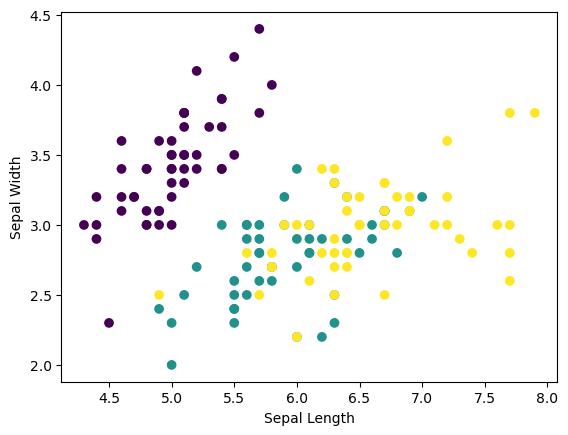

In [5]:
plt.scatter(X[:,0],X[:,1], c = y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

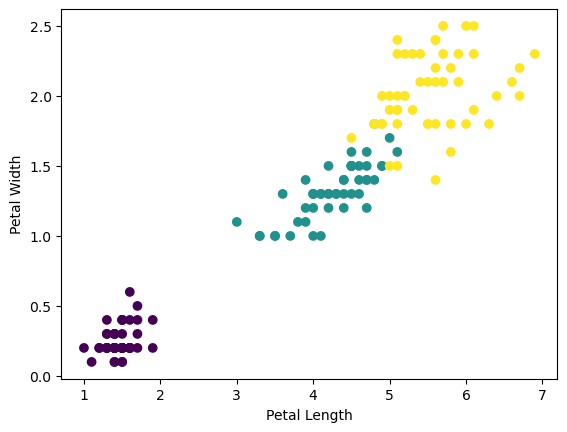

In [7]:
plt.scatter(X[:,2],X[:,3], c = y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Train the Model

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# Evaluate the model

In [10]:
y_pred = model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [11]:
from sklearn.metrics import classification_report,\
confusion_matrix, accuracy_score

In [12]:
model.score(X_test, y_test)

1.0

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

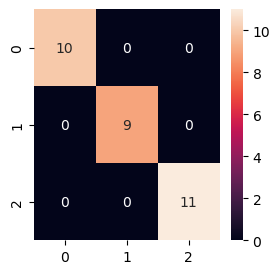

In [15]:
plt.figure(figsize=(3,3))
sns.heatmap(cm,annot=True)
plt.show()

In [18]:
sepal_lt = 2.3
sepal_wt = 0.4
petal_lt = 0.5
petal_wt = 6.4

dummy_data = [[sepal_lt, sepal_wt,petal_lt,petal_wt]]
pred = model.predict(dummy_data)[0]
flower_name = target_names[pred]
print('Flower name is:',flower_name)

Flower name is: setosa
